# Natural Language Processing - easier

In [75]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## PREPARE DATA
### DATASET

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [8]:
# Load dataset
messages = pd.read_csv('./Dataset/smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [9]:
# Head of data
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Dataset describe
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# Dataset group by label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
# Add column 'length' to DataFrame
messages['length'] = messages['message'].apply(len)

In [13]:
# Head of new DataFrame
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


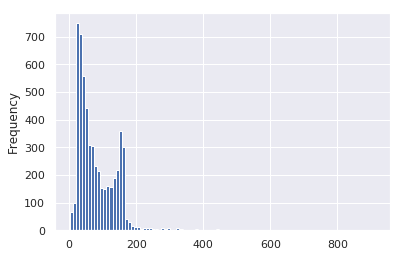

In [14]:
# Plot histogram
messages['length'].plot.hist(bins=100)

In [15]:
# 'length' column describe
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28de27d860>,
      dtype=object)

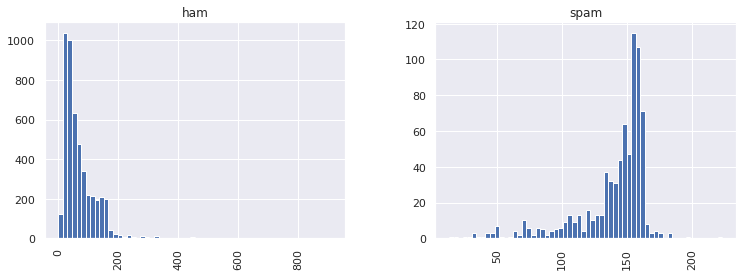

In [16]:
# Histograms for 'ham' and 'spam' columns
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

### Example of deleting punctuation

In [25]:
# Example message
mess = 'Sample message! Notice: it has punctuation.'

In [26]:
# Delete punctuation 
nopunc = [c for c in mess if c not in string.punctuation]

In [27]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
# Merge list
nopunc = ''.join(nopunc)

In [29]:
nopunc

'Sample message Notice it has punctuation'

In [31]:
# Split data by whitespace
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
# Download 'stopwords'
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/przemo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# Delete stop words
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
# Message without stop words
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

### Original data

In [37]:
# Function to preprocessing data
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
# Example using a function
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [41]:
# Using CountVectorizer on dataset
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [42]:
# Vocabluary length
print(len(bow_transformer.vocabulary_))

11425


In [46]:
# Example of message
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [49]:
# Count vectorizer on example message
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [50]:
# Get example of word
bow_transformer.get_feature_names()[9554]

'say'

In [51]:
# Count vectorizer on entire dataset
messages_bow = bow_transformer.transform(messages['message'])

In [52]:
# Shape of transformed message
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [54]:
#Non zero elements
messages_bow.nnz

50548

In [55]:
# Sparsity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [56]:
# TfidfTransformer model
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [61]:
# TfidfTransformer on example message
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [62]:
# TfidfTransformer on entire dataset
messages_tfidf = tfidf_transformer.transform(messages_bow)

 ## Create MultinomialNB model

In [63]:
# Create and train MultinomialNB model
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [67]:
# Predict example message
spam_detect_model.predict(tfidf4)[0]

'ham'

In [69]:
# True label
messages['label'][3]

'ham'

In [70]:
# All predictions
all_pred = spam_detect_model.predict(messages_tfidf)

In [71]:
# Split data for training and testing
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [72]:
# Create Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [73]:
# Fit data to pipeline
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f28d9f99b70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [74]:
# Predictions
predictions = pipeline.predict(msg_test)

In [76]:
# Show metrics for test data
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1533
        spam       0.68      1.00      0.81       139

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.84      0.98      0.89      1672
weighted avg       0.97      0.96      0.96      1672

